In [170]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as std
import statsmodels.api as sm
from sklearn.cross_validation import train_test_split

# Step 1: Load the Data

In [73]:
housingData =  pd.read_csv("housing.csv")

In [74]:
housingData.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [75]:
housingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [76]:
housingData.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Plot Histograms

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000255B6B3A8D0>,
      dtype=object)

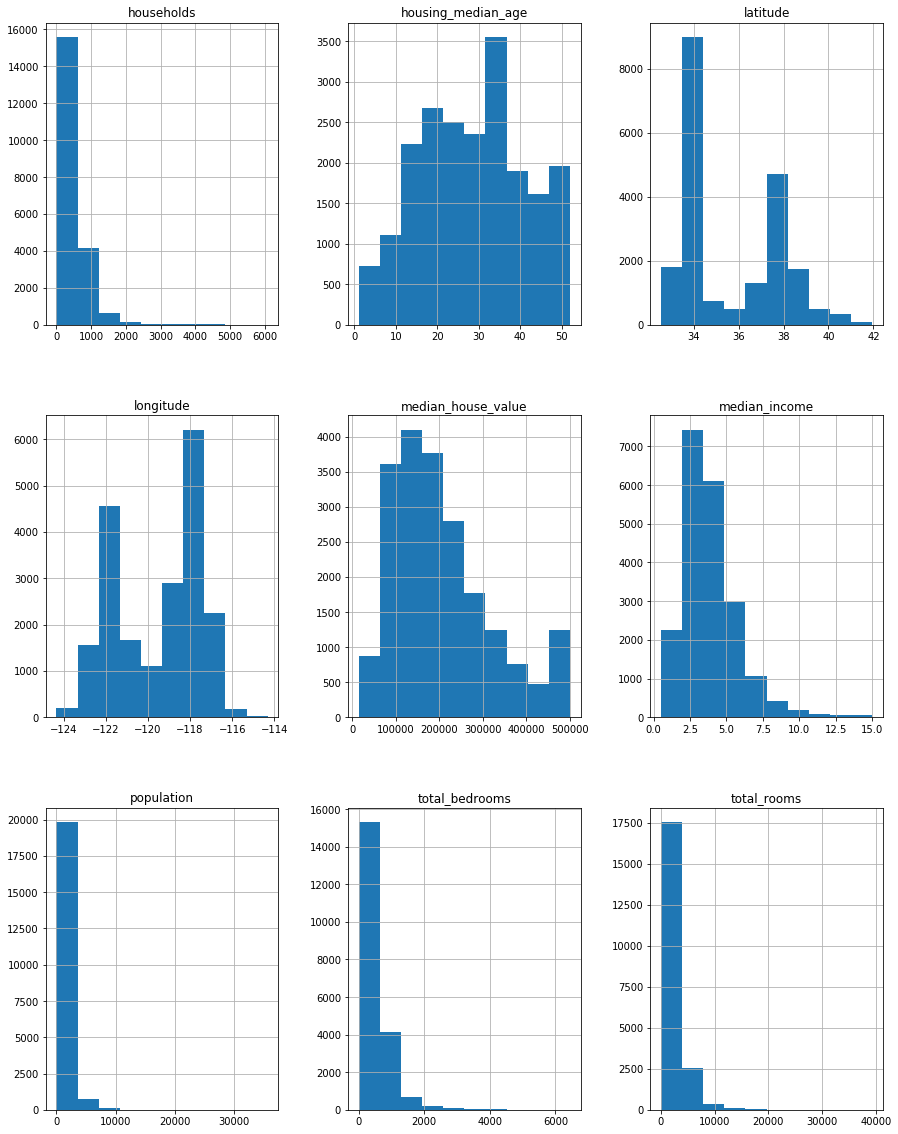

In [78]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
housingData.hist(ax = ax)

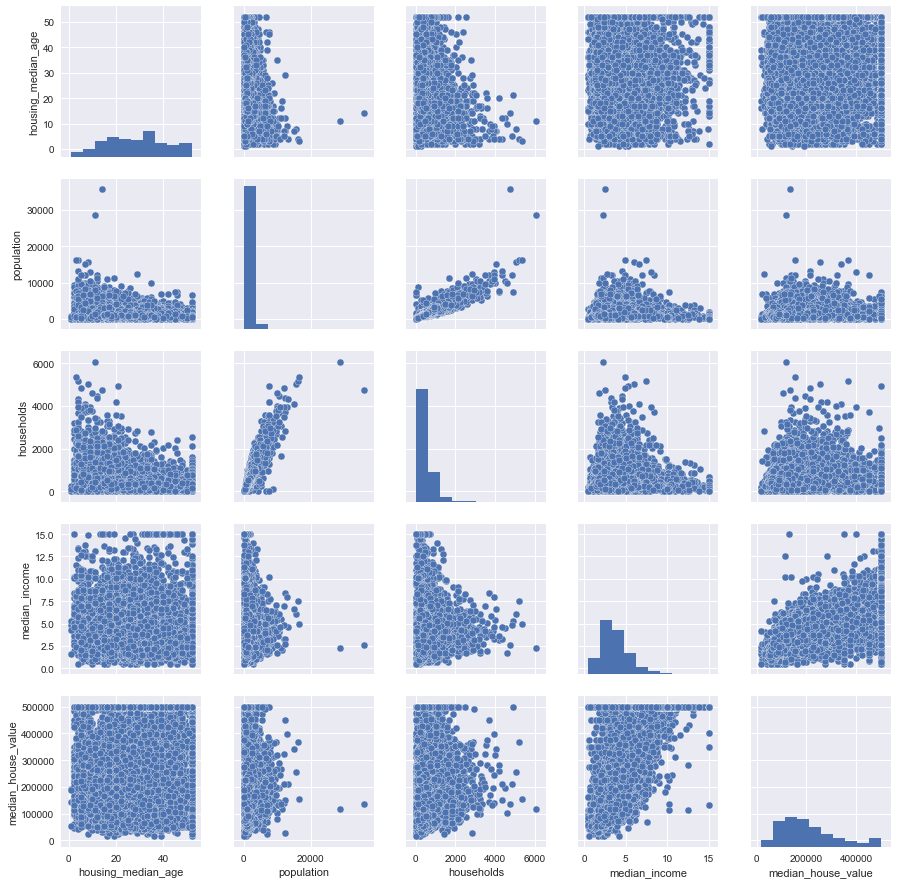

In [180]:
std.set()
cols = [
 'housing_median_age',
 'population',
 'households',
 'median_income',
 'median_house_value']
std.pairplot(housingData[cols])
plt.show();

# Step 2 : Handle missing values

In [79]:
X = housingData.iloc[:,0:8]
Y = housingData.iloc[:,9]

In [80]:
housingData.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [81]:
X.fillna(X.mean(), inplace=True)
Y.fillna(Y.mean(), inplace=True)

In [82]:
X.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

# Step 3 : Encode categorial data

In [84]:
housingData.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [85]:
dummies = pd.get_dummies(housingData['ocean_proximity'])

In [86]:
dummies.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [87]:
X = pd.concat([X,dummies],axis=1)

In [88]:
X.drop(['ocean_proximity'],inplace=True,axis=1,errors='ignore')

In [89]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,0,1,0


# Step 4 : Split the dataset

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 1/4, 
                                                     random_state = 0)

In [91]:
X_test.size

67080

# Step 4 : Standardization of Data

In [92]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [93]:
scaler_train = StandardScaler().fit(X_train)

In [94]:
scaler_test = StandardScaler().fit(X_test)

In [95]:
X_train_scaled  = scaler_train.transform(X_train)

In [96]:
X_test_scaled = scaler_train.transform(X_test)

In [99]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [100]:
vif

[18.034688446495306,
 19.93027684304381,
 1.3219157886597688,
 12.377707681265836,
 27.503599237059536,
 6.345024364740097,
 28.637834344397373,
 1.7429288865000845,
 14806.26017236343,
 10371.865357126379,
 9.241717803184704,
 3748.625831292933,
 4342.4481048784455]

In [101]:
X_train_scaled

array([[-1.55220631,  1.32491944, -0.76426232, ..., -0.0139225 ,
        -0.353669  , -0.38673228],
       [ 1.15953974, -1.25207048, -0.84363104, ..., -0.0139225 ,
        -0.353669  ,  2.58576809],
       [ 0.64610253, -0.44296112, -0.76426232, ..., -0.0139225 ,
        -0.353669  , -0.38673228],
       ...,
       [-1.16338978,  0.44565609,  0.18816232, ..., -0.0139225 ,
        -0.353669  ,  2.58576809],
       [ 0.81558666, -0.93871598,  0.42626848, ..., -0.0139225 ,
        -0.353669  , -0.38673228],
       [ 1.99699073, -1.32222447, -1.0817372 , ..., -0.0139225 ,
        -0.353669  , -0.38673228]])

# Step 6 : Perform Linear Regression

In [102]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

In [103]:
regression_model = linear_model.LinearRegression()

In [104]:
regression_model.fit(X_train_scaled,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [105]:
Y_test_predicted = regression_model.predict(X_test_scaled)

In [106]:
r2_score(Y_test, Y_test_predicted)

0.6384081651714097

In [107]:
print('Coefficients: \n', regression_model.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_test_predicted))
print("Root Mean squared error: %.2f"
      %sqrt(mean_squared_error(Y_test, Y_test_predicted)))

Coefficients: 
 [-54250.54700483 -54903.57465126  13864.13047254 -10592.09899884
  30260.7439336  -43157.92997627  28083.49375038  74319.24278764
   5811.38109885 -12062.15594443   2410.94938111   2336.74725834
   5802.35080154]
Mean squared error: 4779704034.00
Root Mean squared error: 69135.40


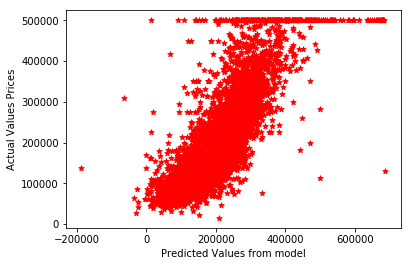

In [108]:
plt.scatter(Y_test_predicted, Y_test, s=30, c='r', marker='*', zorder=10)
plt.xlabel("Predicted Values from model")
plt.ylabel("Actual Values Prices")
plt.show()

# Using k-fold

In [112]:
from sklearn import model_selection

In [113]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
model  = linear_model.LinearRegression()

In [114]:
results = model_selection.cross_val_score(model, X_train_scaled, Y_train, cv=kfold)

In [115]:
results

array([0.65812987, 0.64681975, 0.65110959, 0.65153435, 0.63615054,
       0.63206459, 0.65275687, 0.66490315, 0.58060277, 0.67672394])

# Step 7 :Perform Decision Tree Regression

In [116]:
from sklearn import tree

In [117]:
decision_tree_model = tree.DecisionTreeRegressor()
decision_tree_model = decision_tree_model.fit(X_train_scaled, Y_train)

In [118]:
y_predicted =  decision_tree_model.predict(X_test_scaled)

In [130]:
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, y_predicted))

Mean squared error: 4798225035.70


In [131]:
print("Root Mean squared error : %.2f "%  np.sqrt(mean_squared_error(Y_test, y_predicted)))

Root Mean squared error : 69269.22 


# Step 8 : Perform Random Forest Regression

In [132]:
from sklearn.ensemble import RandomForestRegressor

In [133]:
clf = RandomForestRegressor()
trained_rf = clf.fit(X_train_scaled,Y_train)

In [134]:
y_predicted_rf = trained_rf.predict(X_test_scaled)

In [135]:
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, y_predicted_rf))

Mean squared error: 2614686743.42


In [136]:
print("Root mean squared error: %.2f"
      % np.sqrt(mean_squared_error(Y_test, y_predicted_rf)))

Root mean squared error: 51134.01


In [137]:
r2_score(Y_test, y_predicted_rf)

0.8021949956880414

In [186]:
regression_model_single_variable = linear_model.LinearRegression()
X_train_for_single_regression = X_train.median_income.values.reshape(-1,1)
X_test_for_single_regression = X_test["median_income"].values.reshape(-1,1)

In [187]:
regression_model_single_variable.fit(X_train_for_single_regression,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [188]:
Y_test_single_predicted = regression_model_single_variable.predict(X_test_for_single_regression)
print('Coefficients: \n', regression_model_single_variable.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_test_single_predicted))
print("Root Mean squared error: %.2f"
      %sqrt(mean_squared_error(Y_test, Y_test_single_predicted)))
print(r2_score(Y_test, Y_test_single_predicted))

Coefficients: 
 [42273.4569244]
Mean squared error: 7253534565.16
Root Mean squared error: 85167.68
0.4512591462254417


# Summary 

The rsme values are really high , as data is unbalanced. For eg : total_bedrooms the maximum value is 39320 and min value is 2.
I have tried to plot histograms, heat map and i can see that the correlation values are low and outliers are there. 
